### **Heart Failure Prediction**
> *ML assignment*

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from google.colab import userdata
import os

In [3]:
# Importing data from kaggle
from google.colab import userdata
key= userdata.get('kaggle_key')
name= userdata.get('kaggle_username')

In [4]:
# Set Kaggle credentials
os.environ["KAGGLE_USERNAME"] = userdata.get('kaggle_username')
os.environ["KAGGLE_KEY"] = userdata.get('kaggle_key')

# Download and unzip dataset
!kaggle datasets download -d fedesoriano/heart-failure-prediction
!unzip -o heart-failure-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 3.01MB/s]
Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


## Data Prep

In [5]:
# load data
dataset = pd.read_csv("heart.csv")
# Shape of dataset
print("Data shape: ")
print(dataset.shape)
print("\n Data type and nulls: ")
print(dataset.info())
print("\nDataset statistics: ")
print(dataset.describe())
print("\nNull values: ")
print(dataset.isnull().sum())
print("\nTop 10 rows: ")
print(dataset.head(10))
print("Duplicate rows: ")
print(dataset.duplicated().sum())
# dataset_header= dataset.columns.to_list()
# print(dataset_header)

Data shape: 
(918, 12)

 Data type and nulls: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Dataset statistics: 
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  91

#### Separating data into target and predict and Scaling the data

In [6]:
# Data spiliting and scaling
X = dataset.drop("HeartDisease", axis=1)
y = dataset["HeartDisease"]

X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Data training and measuring accuracies

In [7]:
# Logistic regression
lf_model = LogisticRegression(max_iter=1000, random_state=42)
lf_model.fit(X_train_scaled, y_train)

# Predict on test set
lf_pred = lf_model.predict(X_test_scaled)

print("Logistic Regression->\n")
print(f"Accuracy: {accuracy_score(y_test, lf_pred):.3f}")
print("Classification Report:\n", classification_report(y_test, lf_pred))



Logistic Regression->

Accuracy: 0.886
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [8]:
# Random forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest->\n")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.3f}")
print("Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest->

Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



### Visualization of the data

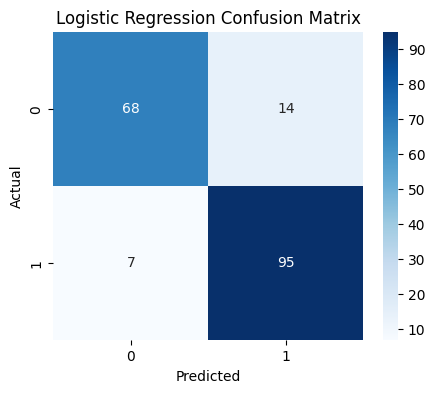

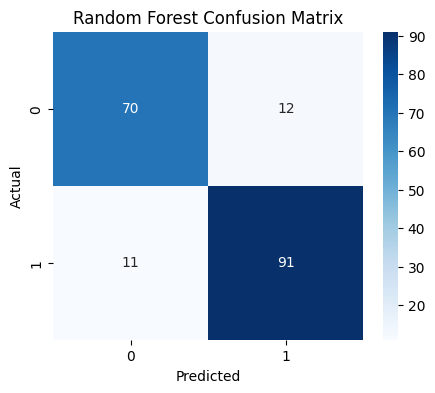

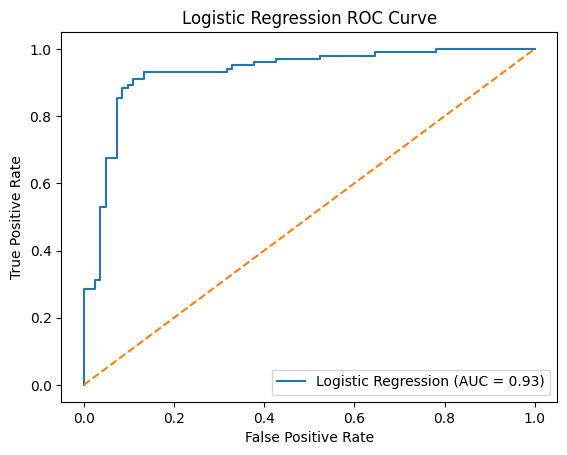

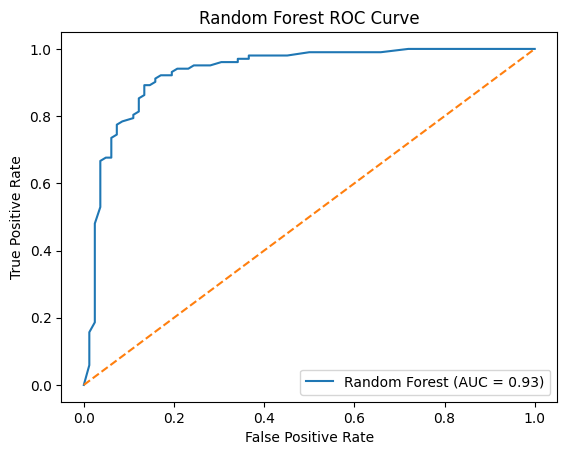

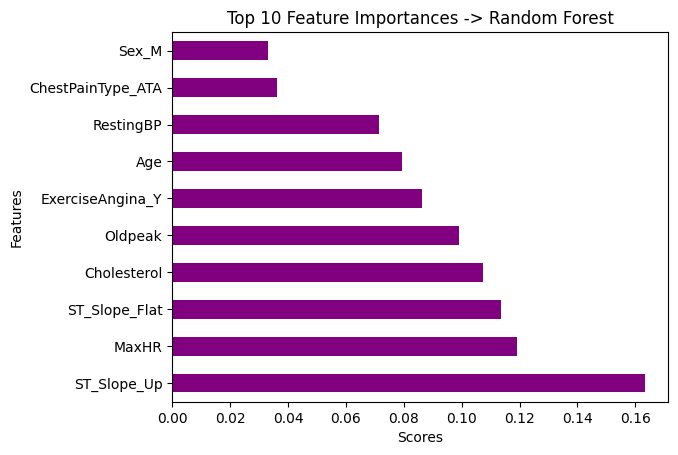

In [9]:

def plot_confusion_matrix(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def plot_roc_curve(model, X_test, y_test, model_name="Model"):
    y_probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.plot([0,1], [0,1], linestyle='--')
    plt.title(f'{model_name} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Data ploting
# Confusion matrix
plot_confusion_matrix(lf_model, X_test_scaled, y_test, "Logistic Regression")
plot_confusion_matrix(rf_model, X_test, y_test, "Random Forest")

# Roc curve
plot_roc_curve(lf_model, X_test_scaled, y_test, "Logistic Regression")
plot_roc_curve(rf_model, X_test, y_test, "Random Forest")

# Ploting the top 10 features that affect the model most using random forest
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh', color='purple')
plt.title('Top 10 Feature Importances -> Random Forest')
plt.xlabel("Scores")
plt.ylabel("Features")
# plt.tight_layout()
plt.show()


